VALORANT Match Performance Analysis

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Load Data


In [2]:
matches = pd.read_csv("matches.csv")
players = pd.read_csv("player_stats.csv")
maps = pd.read_csv("maps_stats.csv")
economy = pd.read_csv("economy_data.csv")


In [3]:
matches.head(3)

,date,match_id,time,team1,score1,team2,score2,score,winner,status,week,stage
0,"Fri, September 12, 2025",542195,6:30 PM,Paper Rex,2,Xi Lai Gaming,0,2-0,Paper Rex,Completed,Opening (A),Group Stage
1,"Fri, September 12, 2025",542196,8:55 PM,GIANTX,2,Sentinels,1,2-1,GIANTX,Completed,Opening (A),Group Stage
2,"Sat, September 13, 2025",542207,6:30 PM,NRG,2,EDward Gaming,0,2-0,NRG,Completed,Opening (C),Group Stage


In [4]:
matches['winner'].value_counts()

winner
NRG               6
DRX               5
FNATIC            5
Paper Rex         4
MIBR              3
Team Heretics     3
GIANTX            2
G2 Esports        2
T1                1
Team Liquid       1
Xi Lai Gaming     1
Rex Regum Qeon    1
Name: count, dtype: int64

In [5]:
matches['stage'].value_counts()

stage
Group Stage    20
Playoffs       14
Name: count, dtype: int64

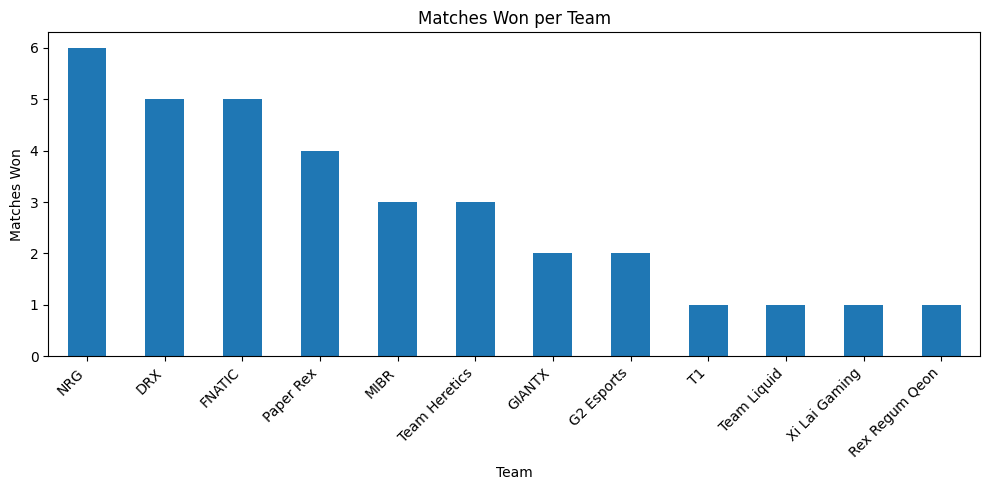

In [6]:
wins_per_team = matches['winner'].value_counts()
wins_per_team_sorted = wins_per_team.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
wins_per_team_sorted.plot(kind='bar')
plt.xlabel("Team")
plt.ylabel("Matches Won")
plt.title("Matches Won per Team")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

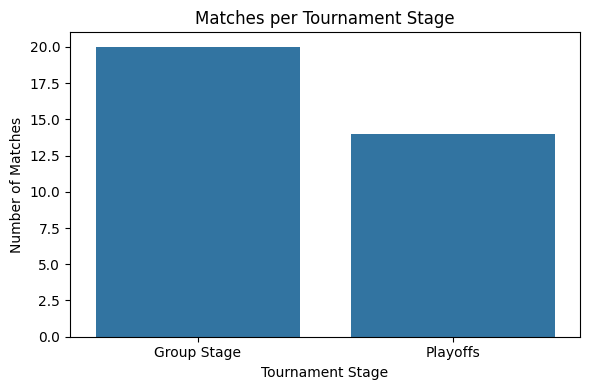

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(data=matches, x='stage')
plt.xlabel("Tournament Stage")
plt.ylabel("Number of Matches")
plt.title("Matches per Tournament Stage")
plt.tight_layout()
plt.show()

In [8]:
players.head(3)

,player,player_name,team,player_id,agents,agents_count,rounds,rating,acs,kd_ratio,...,fdpr,hs_percent,cl_percent,clutches,k_max,kills,deaths,assists,first_kills,first_deaths
0,aspas,aspas,MIBR,8480,"['Neon', 'Waylay', 'Raze', 'Jett']",4,330,1.33,261.6,1.66,...,0.07,26%,8%,2/26,32,319,192,44,67,23
1,RieNs,RieNs,TH,10971,"['Fade', 'Sova']",2,256,1.17,226.1,1.14,...,0.05,34%,20%,7/35,23,203,178,85,18,12
2,brawk,brawk,NRG,2172,"['Sova', 'Vyse']",2,377,1.16,224.6,1.17,...,0.06,17%,9%,4/47,28,275,236,128,26,23


In [9]:
players.isnull().sum()

player          0
player_name     0
team            0
player_id       0
agents          0
agents_count    0
rounds          0
rating          0
acs             0
kd_ratio        0
kast            0
adr             0
kpr             0
apr             0
fkpr            0
fdpr            0
hs_percent      0
cl_percent      0
clutches        0
k_max           0
kills           0
deaths          0
assists         0
first_kills     0
first_deaths    0
dtype: int64

In [10]:
players[['acs','kd_ratio','kast','adr']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   acs       81 non-null     float64
 1   kd_ratio  81 non-null     float64
 2   kast      81 non-null     object 
 3   adr       81 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.7+ KB


In [11]:
players['kast'] = (players['kast'].str.replace('%', '', regex=False).astype(float))

In [12]:
players[['acs','kd_ratio','kast','adr']].describe()


,acs,kd_ratio,kast,adr
count,81.000000,81.000000,81.000000,81.000000
mean,189.753086,0.968642,70.049383,124.253086
std,26.632654,0.162286,4.268786,16.526268
min,140.800000,0.590000,59.000000,92.400000
25%,171.000000,0.880000,67.000000,113.500000
50%,190.200000,0.970000,70.000000,124.100000
75%,211.000000,1.060000,73.000000,135.500000
max,261.600000,1.660000,79.000000,164.700000


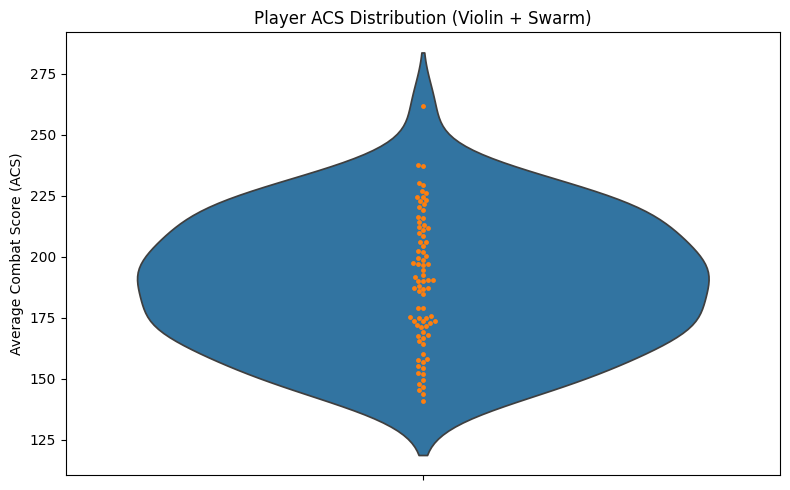

In [13]:
plt.figure(figsize=(8, 5))

sns.violinplot(y=players['acs'],inner=None)

sns.swarmplot( y=players['acs'],  size=3.5, alpha=1)

plt.ylabel("Average Combat Score (ACS)")
plt.title("Player ACS Distribution (Violin + Swarm)")
plt.tight_layout()
plt.show()

In [27]:
top_acs = players.sort_values('acs', ascending=False).head(10)


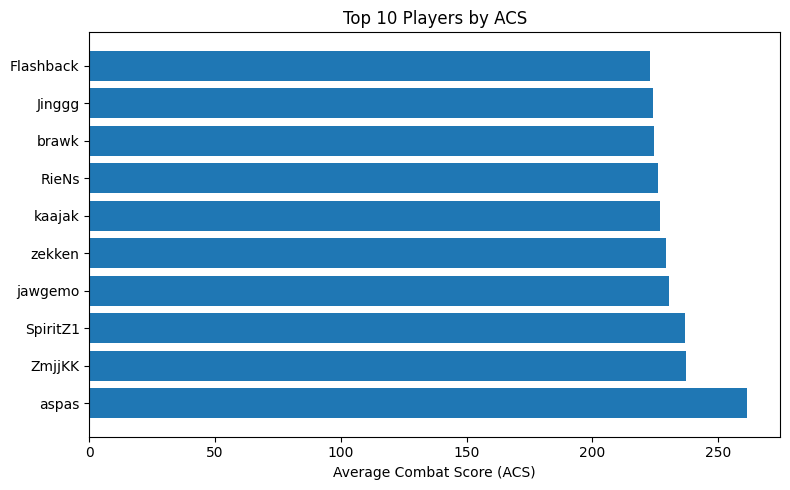

In [28]:
plt.figure(figsize=(8, 5))
plt.barh(top_acs['player_name'], top_acs['acs'])
plt.xlabel("Average Combat Score (ACS)")
plt.title("Top 10 Players by ACS")

plt.tight_layout()
plt.show()


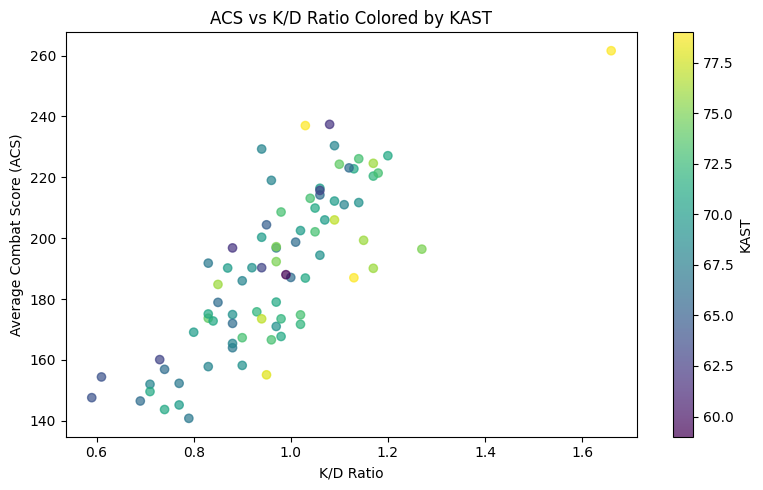

In [16]:
plt.figure(figsize=(8, 5))

scatter = plt.scatter(
    players['kd_ratio'],
    players['acs'],
    c=players['kast'],   
    cmap='viridis',
    alpha=0.7
)

plt.xlabel("K/D Ratio")
plt.ylabel("Average Combat Score (ACS)")
plt.title("ACS vs K/D Ratio Colored by KAST")

cbar = plt.colorbar(scatter)
cbar.set_label("KAST")

plt.tight_layout()
plt.show()


In [18]:
player_match = players.merge(
    matches[['match_id','winner']],
    left_on='team',
    right_on='winner',
    how='left'
)


In [19]:
player_match['win'] = np.where(
    player_match['team'] == player_match['winner'], 1, 0
)


In [20]:
player_match.groupby('win')[['acs','kd_ratio','kast']].mean()


,acs,kd_ratio,kast
win,,,
0,187.880328,0.941148,69.540984
1,196.045333,1.068667,71.986667


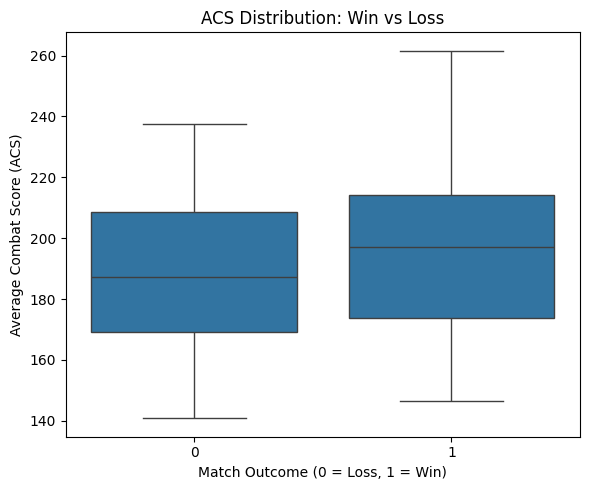

In [21]:
plt.figure(figsize=(6, 5))
sns.boxplot(
    data=player_match,
    x='win',
    y='acs'
)

plt.xlabel("Match Outcome (0 = Loss, 1 = Win)")
plt.ylabel("Average Combat Score (ACS)")
plt.title("ACS Distribution: Win vs Loss")
plt.tight_layout()
plt.show()

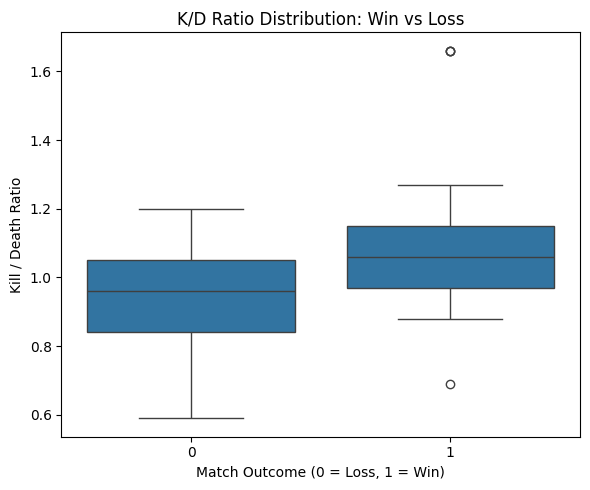

In [22]:
plt.figure(figsize=(6, 5))
sns.boxplot(
    data=player_match,
    x='win',
    y='kd_ratio'
)

plt.xlabel("Match Outcome (0 = Loss, 1 = Win)")
plt.ylabel("Kill / Death Ratio")
plt.title("K/D Ratio Distribution: Win vs Loss")
plt.tight_layout()
plt.show()


In [23]:
metrics = ['acs','kd_ratio','kast','adr','fkpr','fdpr']
corr = player_match[metrics].corr()


Text(0.5, 1.0, 'Performance Metric Correlations')

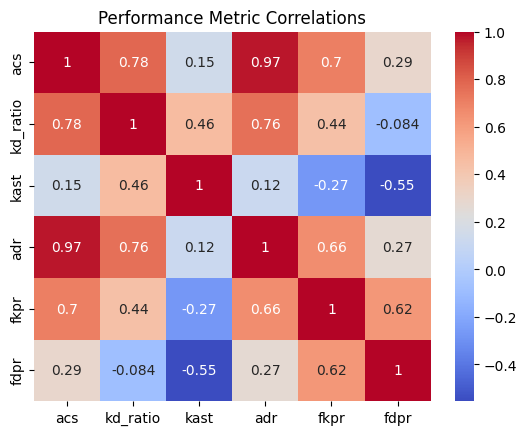

In [24]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Performance Metric Correlations")


In [25]:
maps.sort_values('times_played', ascending=False)


,map_name,times_played,attack_win_percent,defense_win_percent
0,Lotus,18,51%,49%
1,Abyss,14,58%,42%
2,Corrode,13,53%,47%
3,Ascent,11,50%,50%
4,Bind,11,46%,54%
5,Sunset,11,39%,61%
6,Haven,10,58%,42%
